In [1]:
from shapely.geometry import Point, GeometryCollection
from hexcover.util import hexagon_coverage

In [2]:
# central polygon
c = Point(0.0, 0.0)
# this is a namedtuple which will always contain 7 entries, the first one is the central polygon
coverage = hexagon_coverage(c, 10)

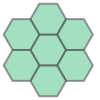

In [3]:
GeometryCollection(coverage)

We can refer to the entries by name:

In [4]:
coverage.centre.centroid.xy

(array('d', [-5.10510982814718e-16]), array('d', [1.021021965629436e-15]))

…or by index:

In [5]:
coverage[4].centroid.xy

(array('d', [-2.917205616084103e-16]), array('d', [-17.32050807568877]))

The docstring shows all available fields:

In [6]:
coverage?

Type:        Hexagons
String form: Hexagons(centre=<shapely.geometry.polygon.Polygon object at 0x1067da320>, top=<shapely.geometry.p <...> Polygon object at 0x109541978>, topleft=<shapely.geometry.polygon.Polygon object at 0x1095419b0>)
Length:      7
File:        ~/dev/hexcover/hexcover/util.py
Docstring:   Hexagons(centre, top, topright, bottomright, bottom, bottomleft, topleft)


# GeoPandas example, real-world data

In [7]:
import geopandas as gp

This is the approximate location of the Crystal Palace Transmitting Station, in [BNG](https://epsg.io/27700) coordinates

We're using Ordnance Survey National Grid coordinates as it's the projection in common use in Britain, and we need to work with projected data since this work involves the calculation of distances.

In [8]:
cpts = Point(533936.11, 171219.47)

Calculate the hexagons, and create a `GeoSeries`

The `GeoSeries` needs its coordinate reference system (CRS) to be set so we can convert back to WGS84, as [required by the GeoJSON spec](https://tools.ietf.org/html/rfc7946#section-4)

In [9]:
# namedtuples are iterable, so we can use them in GeoSeries and GeoDataFrame constructors
gs = gp.GeoSeries(hexagon_coverage(cpts, 100), crs={"init": "epsg:27700"})

Temporarily set the CRS to WGS84 (EPSG 4326), and write out to GeoJSON

In [10]:
gs.to_crs({"init": "epsg:4326"}).to_file("coverage.geojson", driver="GeoJSON")